In [16]:
%matplotlib inline
import os
import sys

import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd

import mglearn
from sklearn.model_selection import train_test_split

## Cross Validation
Evaluates how well a model can generalize when trained on a specific [subset of a] dataset.<br>
_k-fold cross validation_ data is split into k equal sized _folds_. <br>
A model is iteratively tested using one of k folds and trained with the remaining folds.

Benefits<br>
Each sample is used to train the model once (IE not randomized).<br>
Reveals how sensite the model is to training selection.<br>
However it takes k-times slower to compute.

Types:<br>
1. <a href="#strat">Stratifed K-fold</a>
2. <a href="#loo">Leave-one-out</a>
3. <a href="#shuffle">Shuffle-split</a>
4. <a href="#group">Groups</a>

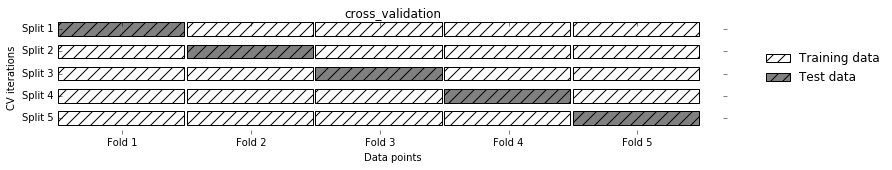

In [2]:
mglearn.plots.plot_cross_validation()

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.96078431  0.92156863  0.95833333]


cross_val_score refauls to 3 folds parameterized using cv

In [4]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 1.          0.96666667  0.93333333  0.9         1.        ]


In [5]:
print("Average cross-validation scores {:.2f}".format(scores.mean()))

Average cross-validation scores 0.96


The range of the five scores suggests either the model's dependency on a particular fold during training or a small dataset.

### Stratifed k-Fold Cross-Validation <a id="strat"></a>
k-folds does not re-order data:

In [6]:
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


_Stratifed k-fold Cross-Validation_ splits the data proportionally between target classes for each fold.

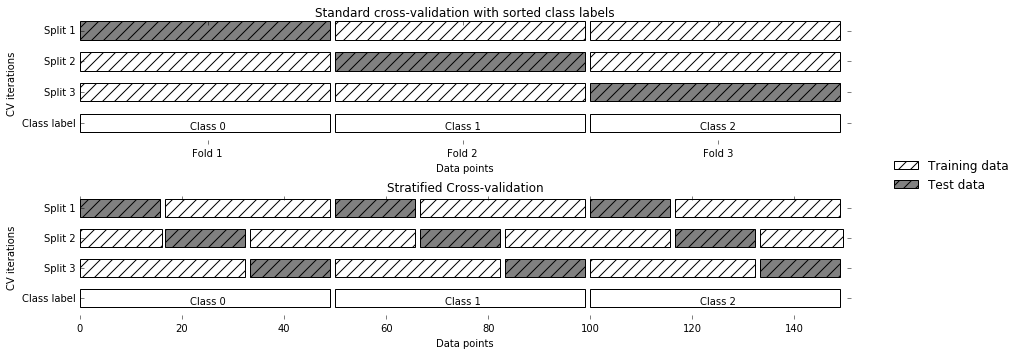

In [7]:
mglearn.plots.plot_stratified_cross_validation()

### Getting fancy with how we split data
by default, k-fold is used for reression and statified k-fold for classification.<br> <a id='fancy'></a>
for explicit kfold for classification, we can explicitly import and pass kfold as the cv arg.

In [8]:
from sklearn.model_selection import KFold
# no statification!
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [37]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 0.  0.  0.]


### Leave-one-out <a id="loo"></a>
For smaller datasets, one data point can be a fold (like jackknife analysis)

In [10]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ",len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


### Shuffle-split <a id="shuffle"></a>
Good to subsample a large dataset, as you have control over how the data is split and how many iterations you want.

Splits samples into **test_size** and **train_size**- many points (integer or floating-point)
**n_splits** interations.

In [11]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.86666667  0.90666667  0.93333333  0.97333333  0.92        0.92
  0.89333333  0.98666667  0.93333333  0.97333333]


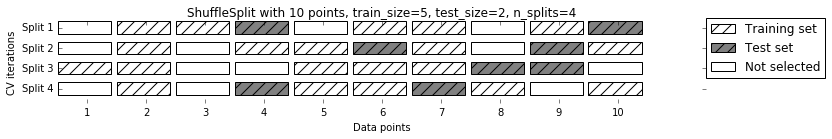

In [12]:
mglearn.plots.plot_shuffle_split()

### Groups <a id="groups"></a>
Keep groups of highly related data together in training and testing.<br>
This is easier for a classifer to detect changes on one group rather than changes across groups.

In [13]:
from sklearn.model_selection import GroupKFold
from mglearn.make_blobs import make_blobs
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group.
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 1.   0.8  1. ]


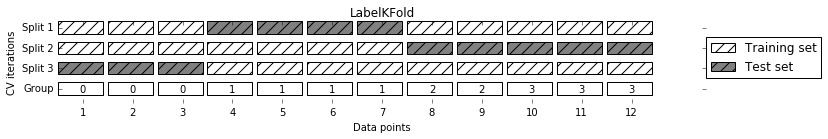

In [14]:
mglearn.plots.plot_label_kfold()

Each split contains the entirety of each group as a training or test set.

## Grid Search <a id="grid_search"></a>
Iteratively try every combination of parameters of interest.<br>
We can apply the different cross-validation splits we just learned, to better generalize and optimize grid search.

A special note here:<br>
The test score doesn't necessarily carry over to new data, so let's also create a validation set.<br>
All exploratory work (and visualization) should be performed on the training and validation set.<br>
The test set must be reserved for the final evaluation, lest we leak info to the model!

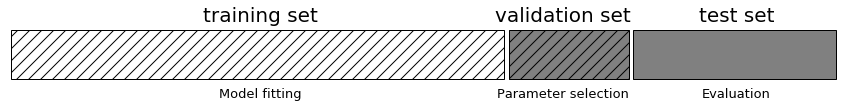

In [15]:
mglearn.plots.plot_threefold_split()

In [19]:
from sklearn.svm import SVC

X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)

print("Size of training set: {} size of validation set: {} size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

# 36 loops for all combos!
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each bombination of parameters, train the SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        
        if score > best_score:
            best_score = score
            best_params = {'C': C, 'gamma': gamma}

svm = SVC(**best_params)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best params: ", best_params)
print("Test set score: {:.2f}".format(test_score))

Size of training set: 84 size of validation set: 28 size of test set: 38

Best score on validation set: 0.96
Best params:  {'gamma': 0.001, 'C': 10}
Test set score: 0.92


We see that .92 is actually how the model performs on new data and NOT 96!<br>

Let's apply cross validation to better split the train and validation set.<br>
Note that for each _fold_ the model takes param_combinations * n_folds times longer to train.

In [ ]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each bombination of parameters, train the SVC
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_params = {'C': C, 'gamma': gamma}

svm = SVC(**best_params)
svm.fit(X_trainval, y_trainval)

The process of param selection and model eval with GridSearchCV is as follows

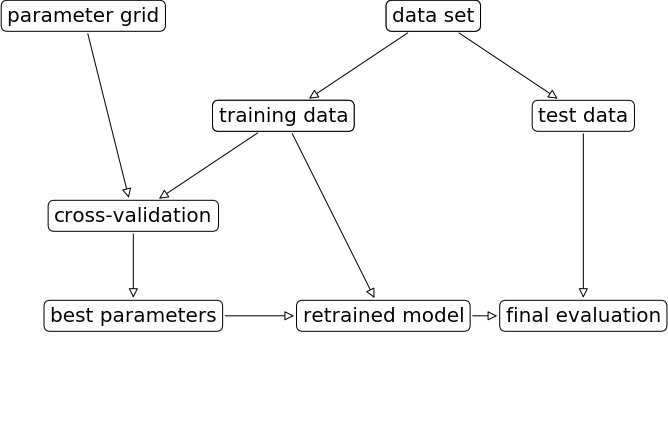

In [20]:
mglearn.plots.plot_grid_search_overview()

### GridSearchCV, it exists!
Scikit-Learn provides a grid search with cross validation when given a dictionary of param settings... wow!<br>
Note: it's best to first try an extreme range in parameters.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Note GridSearchCVsplits training and validation set!
# Also note it acts like a classifier (called a meta-estimator)
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


the _best of_ from grid search is stored in the meta-estimator:

In [23]:
grid_search.best_params_

{'C': 100, 'gamma': 0.01}

In [25]:
grid_search.best_score_

0.9732142857142857

In [26]:
grid_search.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### How to we analyze the results of Grid Search cross-validation?

In [28]:
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001043,0.000492,0.366071,0.366079,0.001,0.001,"{'gamma': 0.001, 'C': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000347,0.000151,0.011371,0.002852
1,0.001041,0.000418,0.366071,0.366079,0.001,0.01,"{'gamma': 0.01, 'C': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000154,0.000098,0.011371,0.002852
2,0.001476,0.000830,0.366071,0.366079,0.001,0.1,"{'gamma': 0.1, 'C': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000540,0.000506,0.011371,0.002852
3,0.001574,0.000912,0.366071,0.366079,0.001,1,"{'gamma': 1, 'C': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000503,0.000535,0.011371,0.002852
4,0.001248,0.000587,0.366071,0.366079,0.001,10,"{'gamma': 10, 'C': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000343,0.000231,0.011371,0.002852


Let's visualize the performance of each parameter combo as a heatmap:

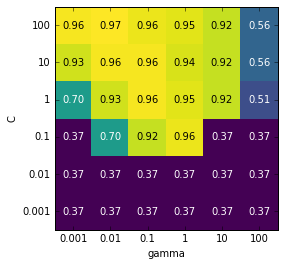

In [30]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

Common interpretatons of heatmap
1. No changes: improper scaling, or one parameter is not important at all
2. Vertical stripe: only one parameter makes any difference, or the other param is not looking at an interesting range.
3. Large sections of boring: that param range of boring values should be excluded.

### Getting fancy sing grid search
kernels can be distinguished between <br>
**linear** look at one paramater.<br>
**rbf** look at specified parameters.

GridSearchCV can take a list of dictioanries and<br>
we can <a href="#fancy">get fancy</a> about how we split data for cross validation by setting cv.

In [36]:
param_grid = [
    {'kernel':['rbf'], 
     'C': [0.001, 0.01, 0.1, 1, 10, 100],
     'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
     {'kernel':['linear'], 
     'C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=8)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'gamma': 0.01, 'kernel': 'rbf', 'C': 100}
Best cross-validation score: 0.97


In [34]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00235658,0.00168166,0.00213223,0.000602198,0.000619793,0.000767803,0.000641394,0.000581789,0.000600576,0.000608206,...,0.000354767,0.00058136,0.00102181,0.00124817,0.000542545,0.000431156,0.000355768,0.000337982,0.000378275,0.000432014
mean_score_time,0.000619841,0.000773621,0.000954819,0.000236607,0.000224018,0.0003232,0.000240993,0.000229549,0.000227022,0.000232601,...,0.000190067,0.000236607,0.000274801,0.000374651,0.000252247,0.000208378,0.000203466,0.000191212,0.000198126,0.000251961
mean_test_score,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,...,0.955357,0.946429,0.919643,0.5625,0.366071,0.848214,0.946429,0.973214,0.964286,0.964286
mean_train_score,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,...,0.988788,1,1,1,0.366079,0.855069,0.966538,0.984368,0.988813,0.993258
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'gamma': 0.001, 'kernel': 'rbf', 'C': 0.001}","{'gamma': 0.01, 'kernel': 'rbf', 'C': 0.001}","{'gamma': 0.1, 'kernel': 'rbf', 'C': 0.001}","{'gamma': 1, 'kernel': 'rbf', 'C': 0.001}","{'gamma': 10, 'kernel': 'rbf', 'C': 0.001}","{'gamma': 100, 'kernel': 'rbf', 'C': 0.001}","{'gamma': 0.001, 'kernel': 'rbf', 'C': 0.01}","{'gamma': 0.01, 'kernel': 'rbf', 'C': 0.01}","{'gamma': 0.1, 'kernel': 'rbf', 'C': 0.01}","{'gamma': 1, 'kernel': 'rbf', 'C': 0.01}",...,"{'gamma': 0.1, 'kernel': 'rbf', 'C': 100}","{'gamma': 1, 'kernel': 'rbf', 'C': 100}","{'gamma': 10, 'kernel': 'rbf', 'C': 100}","{'gamma': 100, 'kernel': 'rbf', 'C': 100}","{'kernel': 'linear', 'C': 0.001}","{'kernel': 'linear', 'C': 0.01}","{'kernel': 'linear', 'C': 0.1}","{'kernel': 'linear', 'C': 1}","{'kernel': 'linear', 'C': 10}","{'kernel': 'linear', 'C': 100}"
rank_test_score,27,27,27,27,27,27,27,27,27,27,...,9,11,17,24,27,21,11,1,3,3
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333


### A final note about parallelization
cross_val_score and GridSearchCV can be parallelized using **n_jobs**, but that parallelism fails on estimators like randomforest, which itself is parallelized.<br>
Monitor memory usage on large datasets!

Look into spark-sklearn

## Evaluation Metrics and Scoring

_Imbalanced datasets_ containe one class much more frequently than the other, causing accuracy to be a non-trustworthy metric.<br>
Is the digit 9?

In [39]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [44]:
from sklearn.dummy import DummyClassifier
# always guess not 9
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [46]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [47]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {}".format(logreg.score(X_test, y_test)))

dummy score: 0.8111111111111111
logreg score: 0.9777777777777777


### Confusion Matrices


In [50]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
confusion

array([[401,   2],
       [  8,  39]])

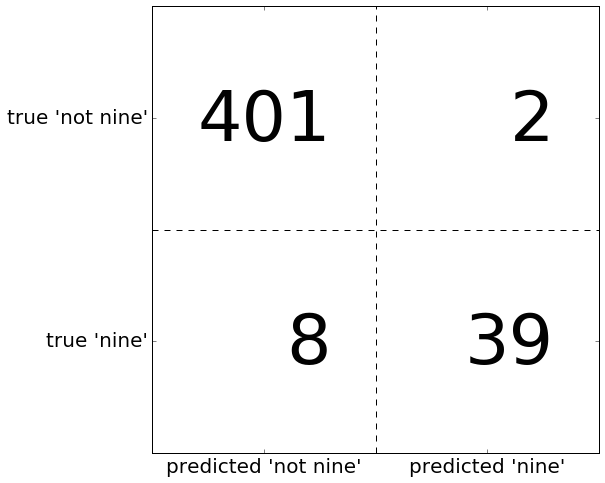

In [51]:
mglearn.plots.plot_confusion_matrix_illustration()

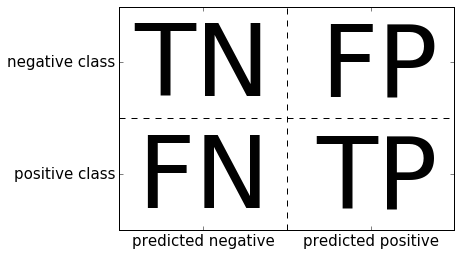

In [52]:
mglearn.plots.plot_binary_confusion_matrix()

In [54]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision Tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression:")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[375  28]
 [ 46   1]]

Decision Tree:
[[390  13]
 [ 24  23]]

Logistic Regression:
[[401   2]
 [  8  39]]
